In [1]:
import uproot
import awkward

import numpy as np
from matplotlib import pyplot as plt

from pprint import pprint

import os

In [2]:
file_dir = '../data/base/Ntuple_runsampic_166_runtelescope_643.root'
file = uproot.open(file_dir)

file.keys()

['desy;24', 'desy;23']

# Contents of the file

In [3]:
file_events = file['desy;23']
file_events.show()
print(file_events.keys())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
RunSampic            | int32_t                  | AsDtype('>i4')
RunTelescope         | int32_t                  | AsDtype('>i4')
eventIDTelescope     | int32_t                  | AsDtype('>i4')
nTrackParams         | int32_t                  | AsDtype('>i4')
planeID              | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
trackID              | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
triggerID            | int32_t                  | AsDtype('>i4')
timestamp            | int32_t                  | AsDtype('>i4')
xPos                 | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
yPos                 | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
omega                | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
phi                  | std::vector<double> 

# Extract needed data

In [4]:
FILE_KEY = 'desy;23'
EVENT_KEYS = set(['num_samples', 'eventIDSampic', 'sample_time', 'sample_ampl', 'sample_channel'])

In [94]:
def extract_filtered_data(file_events, event_keys=EVENT_KEYS):
    mask = file_events['num_samples'].array() > 0
    events_filtered = {k: file_events[k].array(library='np')[mask] for k in event_keys}
    return events_filtered

In [96]:
file_events = file[FILE_KEY]
events_filtered = extract_filtered_data(file_events)

In [97]:
events_filtered.keys()

dict_keys(['num_samples', 'sample_channel', 'sample_ampl', 'sample_time', 'eventIDSampic'])

In [98]:
# file_name = os.path.split(file_dir)[1]
file_name = 'output.npy'
print(f'Processing {file_name} ...')

np.save(f'../data/{file_name}', events_filtered)

Processing output.npy ...


# Read the new file

In [99]:
new_events = np.load(f'../data/{file_name}', allow_pickle=True).flat[0]

In [100]:
new_events

{'num_samples': array([4, 2, 3, ..., 3, 1, 1], dtype=uint32),
 'sample_channel': array([array([29, 11, 16, 23]), array([10, 22]), array([11, 23,  0]), ...,
        array([29, 11, 17]), array([0]), array([0])], dtype=object),
 'sample_ampl': array([array([[1.0274961 , 1.0277164 , 1.0294348 , 1.01722896, 0.99319893,
                0.9707067 , 0.96062344, 0.9713921 , 0.98597014, 1.00195193,
                1.00710535, 0.99913859, 0.97693354, 0.94882756, 0.93879193,
                0.94620717, 0.96202379, 0.98187059, 0.9957155 , 1.00536394,
                0.99961936, 0.99190164, 0.98429471, 0.98307788, 0.99182111,
                1.00774622, 1.02095973, 1.02894449, 1.02855551, 1.01323497,
                0.98326182, 0.94569141, 0.89147842, 0.84386921, 0.7909534 ,
                0.74711734, 0.69818062, 0.6687718 , 0.64322722, 0.60974246,
                0.57817602, 0.55136406, 0.53085387, 0.5242579 , 0.54641229,
                0.56982124, 0.57830697, 0.56357867, 0.55537343, 0.55436993,


# Example samples

In [101]:
def plot_sample(events, i_event, i_sample, use_time=False, flip=True):
    if use_time:
        X = events['sample_time'][i_event][i_sample]
    else:
        X = np.arange(64)
    Y = events['sample_ampl'][i_event][i_sample]
    if flip:
        Y = (Y - 1) * -1
    plt.plot(X, Y)
#     plt.title(f"sampic event id: {events_filtered['eventIDSampic']}, ({i_event}, {i_sample})")
    # print(events['sample_channel'][i_event][i_sample])
    plt.title(f"({i_event}, {i_sample}), channel: {events['sample_channel'][i_event][i_sample]}")
    # plt.ylim(-0.1, 1.1)

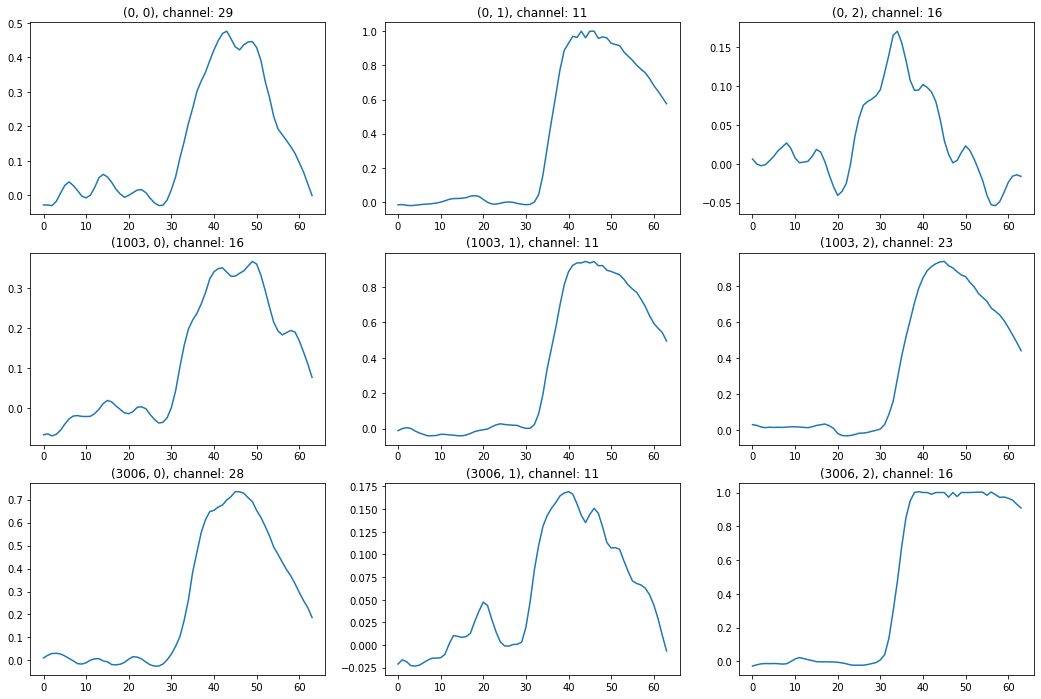

In [102]:
events = [0, 0, 0, 1003, 1003, 1003, 3006, 3006, 3006]
samples = [0, 1, 2, 0, 1, 2, 0, 1, 2]

plt.figure(figsize=(18, 12))
for i, (i_event, i_sample) in enumerate(zip(events, samples)):
    plt.subplot(3, 3, i + 1)
    plot_sample(new_events, i_event, i_sample)

In [103]:
new_events['num_samples'][:20]

array([4, 2, 3, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 1, 1, 4, 2, 5, 1, 1],
      dtype=uint32)

In [104]:
new_events['sample_channel'][-40:]

array([array([27]), array([30, 10]), array([12, 24]), array([29, 11, 17]),
       array([30, 18]), array([23,  0, 11]), array([0]),
       array([29, 11, 17]), array([ 0, 18, 30]), array([10, 22]),
       array([0]), array([22, 11, 23, 29, 17]), array([11, 23, 29]),
       array([16, 11, 17]), array([28, 11, 16,  0, 23]), array([0]),
       array([0]), array([30, 18]), array([24]), array([24, 15]),
       array([24, 28]), array([0]), array([28, 11, 16]),
       array([23, 11, 28, 29]), array([29, 17]), array([24, 12]),
       array([30, 18]), array([0]), array([22, 10, 23, 29, 17]),
       array([23, 11]), array([ 9, 21]), array([24, 12]), array([27, 15]),
       array([12, 24]), array([0]), array([16, 11, 23]),
       array([22, 11, 23]), array([29, 11, 17]), array([0]), array([0])],
      dtype=object)

In [105]:
len(new_events['sample_channel']) - 39

382087

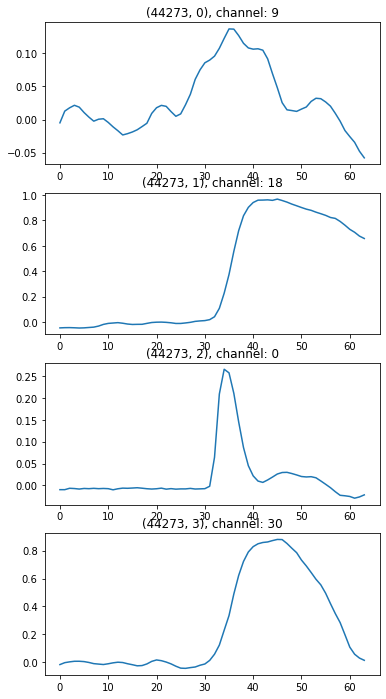

In [106]:
plt.figure(figsize=(6, 12))
for i, (i_event, i_sample) in enumerate(zip([44273, 44273, 44273, 44273], [0, 1, 2, 3])):
    plt.subplot(4, 1, i + 1)
    plot_sample(new_events, i_event, i_sample)

In [107]:
c = 0

for channels in new_events['sample_channel']:
    if len(channels) >= 2 and 0 in channels:
        c += 1
        
c

59039